<a href="https://colab.research.google.com/github/kahlawy/ASP.NET6CoreWithHangfireDemo/blob/master/Copy_of_Coding_the_Fashion_MNIST_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding the Fashion MNIST Model


 quickstart for beginners

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255 which is called **normalization**. This also converts the sample data from integers to floating-point numbers:

In [ ]:
data = tf.keras.datasets.fashion_mnist


In [ ]:
 # load data

(training_images, training_labels), (val_images, val_labels) = data.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


After executing this line of code, training_images will have our 60,000 training images and training_labels will have their associated labels. Additionally val_images and val_labels will have 10,000 images and their associated labels. We’ll hold them back and not use them when training, so we can have a set of data that the neural network hasn’t previously “seen” when we explore its efficacy.

In [ ]:
# Normlization of the data dimensions so that they are approximately the same scale.

training_images  = training_images / 255.0
val_images = val_images / 255.0
print(training_labels)

[9 0 0 ... 3 0 5]


This process called **normalization** which means to set a value to something between 0 and 1. Our pixels are between 0 and 255, so by dividing by 255, we’ll normalize them.



# Show the first 25 images in the training dataset.


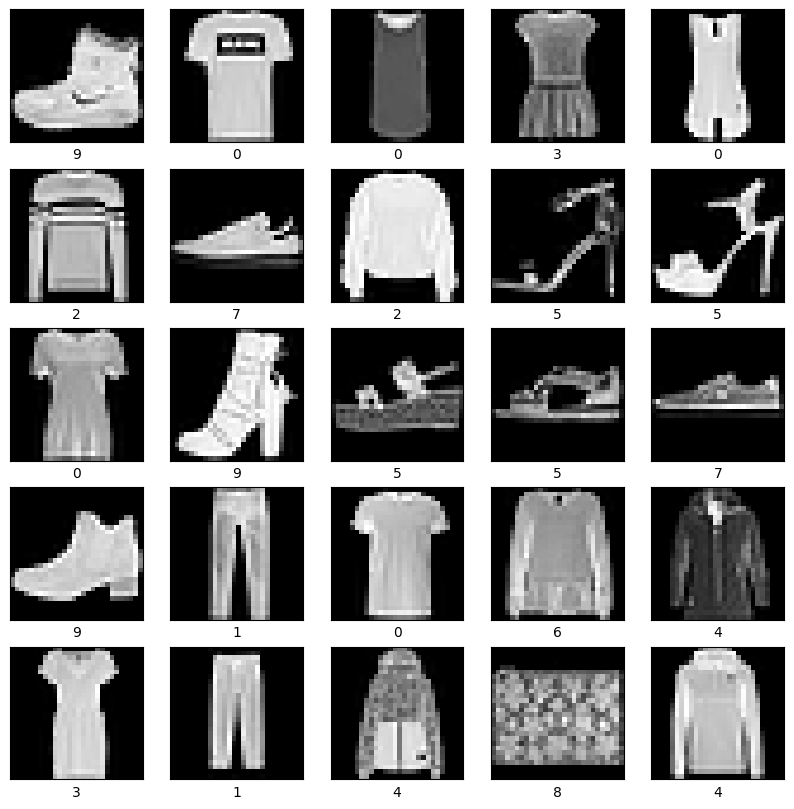

In [ ]:
# Show the first 25 images in the training dataset.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i], cmap=plt.cm.gray)
  plt.xlabel(training_labels[i])
plt.show()

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

**Sequential** : allows us to define the layers in our network using a list.
Each element in that list defines a layer type (in this case **a Flatten** followed by two **Dense** layers), as well as details about the layer, such as the number of neurons and the activation function.

**Flatten(input_shape=(28,28))**: input shape of 28 × 28 gets flattened into the 784 × 1 that you need to feed into the neural network.

**Dense layer** with 128 neurons, and another **Dense layer** with 10 neurons.

**activation parameter**: activation function, which executes at the end of the processing of its layer.

After defining the model architecture, you compile your model, specifying the **loss function** and the **optimizer**:

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Given that this model is going to have more than one output classes or categories of output, we will use a categorical loss function to measure them effectively, like **sparse_categorical_crossentropy**.

**metrics=['accuracy']** which asks TensorFlow to report on accuracy while training. As we are doing categorical model training, where we want the classifier to tell us what it thinks it sees, we can use basic accuracy, i.e., how many of the training images it got “right” with its guess, and report on that along with the loss value. By specifying metrics at compile time, TensorFlow will report this back to us.


## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [ ]:
model.fit(training_images, training_labels, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7681 - loss: 0.6599
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8612 - loss: 0.3778
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8775 - loss: 0.3366
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8812 - loss: 0.3202
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8896 - loss: 0.2944
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8904 - loss: 0.2907
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8996 - loss: 0.2679
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9016 - loss: 0.2596
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9066 - loss: 0.2480
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9070 - loss: 0.2425
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9113 - loss: 0.2376
Epoch 12/20
1875/1875 ━━

what’s an an iteration? what’s an epoch?
Epoch — one forward pass and one backward pass of all the training examples
Iteration — number of passes, one forward pass and one backward pass.

Example: **Fashion** MNIST defaults to each batch having 32 images , if you have 60,000 training examples, and your batch size is 32 image, then it will take 1875 iterations to complete 1 epoch.


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(val_images, val_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8829 - loss: 0.3792


[0.37288808822631836, 0.8828999996185303]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

In [ ]:
# Export to Tensorflow model and label file in `export_dir`.
model.export('/content/fashion_model')


Saved artifact at '/content/fashion_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140707196533840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140707196534032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140707196534416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140707196524432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140707196533264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140707196534224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140707196534608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140707196533648: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
